In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.expand_frame_repr', False) # DataFrame 출력시 짤림 해결

In [77]:
# seaborn의 mpg 데이터셋 가져오기
mpg_df = sns.load_dataset('mpg')

# 데이터 살펴보기
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [78]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [79]:
mpg_df.describe(include = 'all')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398,398
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,305
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,usa,ford pinto
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249,6
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,NaN,NaN
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,NaN,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,NaN,NaN
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,NaN,NaN
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,NaN,NaN
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,NaN,NaN


In [80]:
# horsepower열에 결측치가 존재하므로 대체
hor_mean = mpg_df['horsepower'].mean()
mpg_df['horsepower'].replace(np.nan, hor_mean, inplace = True)
mpg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


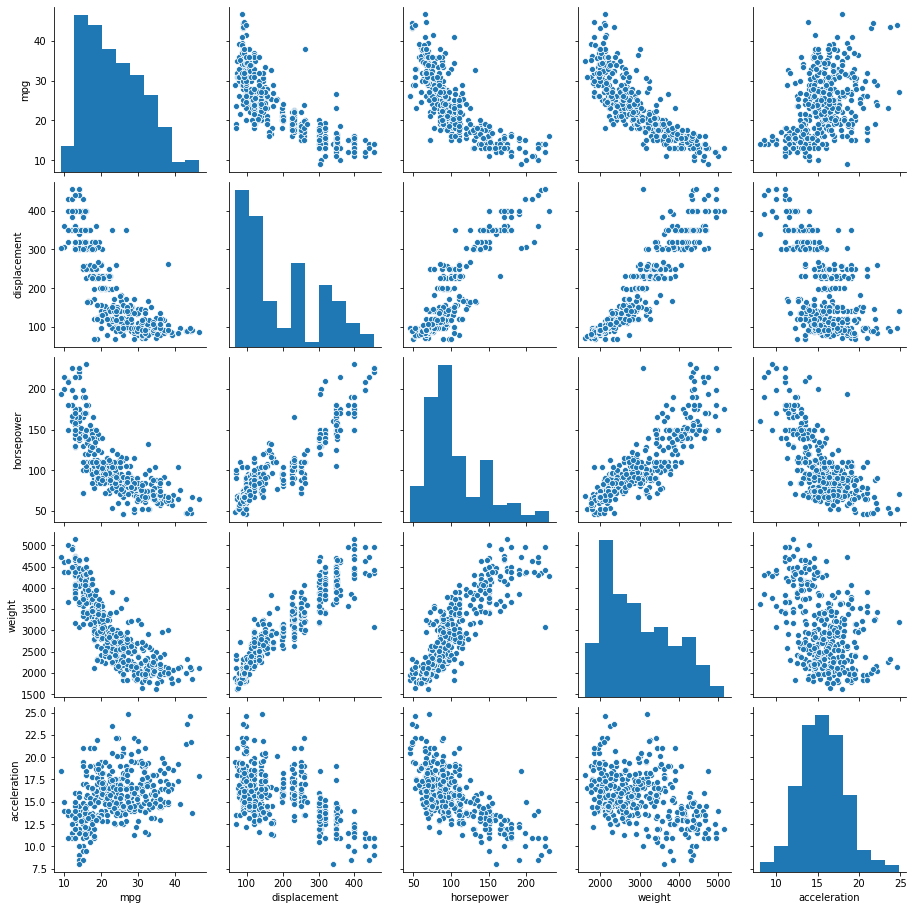

In [81]:
# 분석에 활용할 변수 선택 (연비, 배기량, 출력, 중량, 가속력)
ndf = mpg_df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]

# 두 변수씩 짝을 지을 수 있는 모든 경우에 대한 그래프(산점도) 확인(seaborn.pairplot())
sns.pairplot(ndf)  
plt.show()
plt.close()

### mpg는 weight와 양의 선형관계임이 확인  -> 단순선형회귀분석 가능

In [82]:
# weight을 x, mpg를 y로 선택
X = ndf[['weight']] #독립 변수 X, 독립변수는 해당 라이브러리에서 2D Array로 집어넣어야 함.
Y = ndf['mpg']  #종속 변수 Y
print(X, '\n\n')
print(Y)

     weight
0      3504
1      3693
2      3436
3      3433
4      3449
..      ...
393    2790
394    2130
395    2295
396    2625
397    2720

[398 rows x 1 columns] 


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


In [83]:
## dataset을 training data와 test data로 분할
# train_test_split(독립변수, 종속변수, test data 사이즈(%), 랜덤 추출 시드값)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test),"\n")

train data 개수:  278
test data 개수:  120 



In [84]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 회귀모델 학습
lr.fit(X_train, Y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R^2) 계산
r_square = lr.score(X_test, Y_test)

# 회귀식과 결정계수(R^2) 산출
print('회귀식 :', float(lr.coef_),'X +',lr.intercept_)
print('결정계수(R^2) :', r_square)

회귀식 : -0.007655397189267713 X + 46.60365052224634
결정계수(R^2) : 0.689363809315209


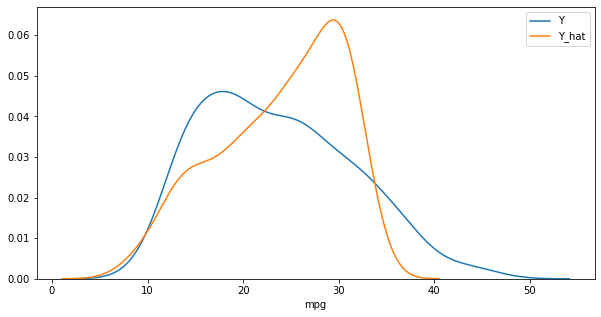

In [85]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
Y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = "Y")
ax2 = sns.distplot(Y_hat, hist = False, label = "Y_hat", ax = ax1)
plt.show()
plt.close()

### Weight와 Mpg의 관계를 보니 비선형으로 표현할 경우 더 좋은 예측이 가능해보인다...
### 그렇다면 다항회귀분석을 해보자!

In [86]:
# sklearn 라이브러리에서 선형회귀분석 및 다항식 변환 모듈 가져오기
from sklearn.linear_model import LinearRegression #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures #다항식 변환

# 다항식 변환 
poly = PolynomialFeatures(degree = 2) #2차항 적용
X_train_poly = poly.fit_transform(X_train) #X_train 데이터를 2차항으로 변형

# train data를 가지고 모형 학습
pr = LinearRegression()   
pr.fit(X_train_poly, Y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R^2) 계산
X_test_poly = poly.fit_transform(X_test) # X_test 데이터를 2차항으로 변형
r_square = pr.score(X_test_poly,Y_test)
print('회귀식 :', pr.coef_[1],'X^2 +',pr.coef_[2],'X +',pr.intercept_)
print('결정계수(R^2) :', r_square)
print('\n')

회귀식 : -0.016911418141332478 X^2 + 1.4345111388654186e-06 X + 60.405921782601645
결정계수(R^2) : 0.72554701541758




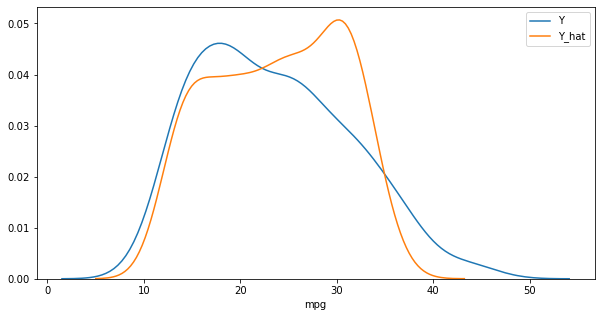

In [87]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교
X_ploy = poly.fit_transform(X)
Y_hat = pr.predict(X_ploy)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = "Y")
ax2 = sns.distplot(Y_hat, hist = False, label = "Y_hat", ax = ax1)
plt.show()
plt.close()

### 흠... 그렇다면... 다중선형회귀분석으로도 해보자!

In [88]:
X = ndf[['displacement', 'horsepower', 'weight', 'acceleration']] #독립 변수 X, 독립변수는 해당 라이브러리에서 2D Array로 집어넣어야 함.
Y = ndf['mpg']  #종속 변수 Y
print(X, '\n\n')
print(Y)

     displacement  horsepower  weight  acceleration
0           307.0       130.0    3504          12.0
1           350.0       165.0    3693          11.5
2           318.0       150.0    3436          11.0
3           304.0       150.0    3433          12.0
4           302.0       140.0    3449          10.5
..            ...         ...     ...           ...
393         140.0        86.0    2790          15.6
394          97.0        52.0    2130          24.6
395         135.0        84.0    2295          11.6
396         120.0        79.0    2625          18.6
397         119.0        82.0    2720          19.4

[398 rows x 4 columns] 


0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64


In [89]:
## dataset을 training data와 test data로 분할
# train_test_split(독립변수, 종속변수, test data 사이즈(%), 랜덤 추출 시드값)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

print('train data 개수: ', len(X_train))
print('test data 개수: ', len(X_test),"\n")

train data 개수:  278
test data 개수:  120 



In [90]:
# sklearn 라이브러리에서 선형회귀분석 모듈 가져오기
from sklearn.linear_model import LinearRegression

# 단순회귀분석 모형 객체 생성
lr = LinearRegression()

# train data를 가지고 회귀모델 학습
lr.fit(X_train, Y_train)

# 학습을 마친 모형에 test data를 적용하여 결정계수(R^2) 계산
r_square = lr.score(X_test, Y_test)

# 회귀식과 결정계수(R^2) 산출
print('회귀식 :', lr.coef_,'Xn +',lr.intercept_)
print('결정계수(R^2) :', r_square)

회귀식 : [-0.00421149 -0.03921571 -0.00552434  0.09011602] Xn + 43.761423423940464
결정계수(R^2) : 0.6864484651226495


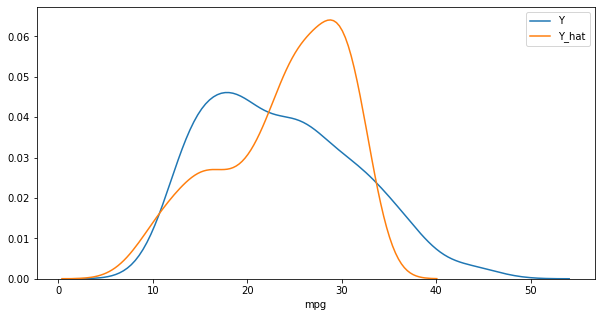

In [91]:
# 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 
Y_hat = lr.predict(X)

plt.figure(figsize = (10, 5))
ax1 = sns.distplot(Y, hist = False, label = "Y")
ax2 = sns.distplot(Y_hat, hist = False, label = "Y_hat", ax = ax1)
plt.show()
plt.close()